In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nparticle = 1000
Nstep = 1000

np.random.seed(2111) # allows repeating / changing the PRNG sequence

moves = (-1,+1)                          # tuple of moves (immutable, faster)
colors = ["r-","b-","g-","m-","c-","y-"] # list of colors (mutable, slower)

step = np.arange( 0, Nstep, 1)       # array of step indexes
path = np.zeros( Nstep, dtype=float) # array of size Nstep for storing path of individual particle

pcle = np.arange( 0, Nparticle, 1)       # array of particle indexes
rnge = np.zeros( Nparticle, dtype=float) # array of size Nparticle that's stores particle range

mean = np.zeros( Nstep, dtype=float) # array of size Nstep used for calculating mean displacement stats of many particles
rmsq = np.zeros( Nstep, dtype=float) # array of size Nstep used for calculating rms displacement stats of many particles

Text(0, 0.5, 'particle walk')

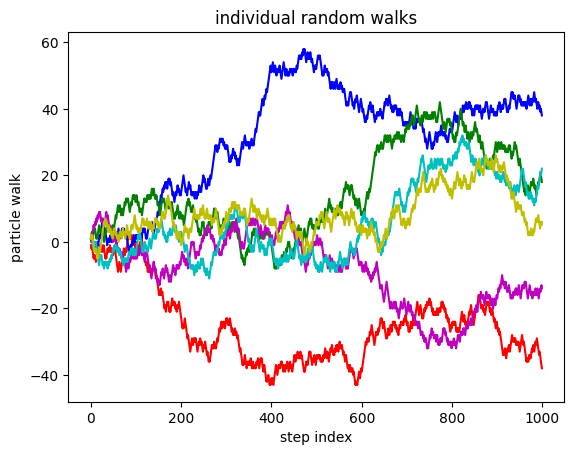

In [ ]:
# example of few random walks and gamblers ruin (gamblers funds vs casino funds)

Nparticle = 6
Nstep = 1000

for ip in range( 0, Nparticle): # loop over particles, index ip
    x = 0 # start at origin

    for ix in range( 0 , Nstep): # loop over steps, index ix
        x += np.random.choice(moves) # move by -1 or +1
        path[ix] = x

    plt.plot( step, path, colors[ ip%6 ]) # plot path of each particle

plt.title("individual random walks")
plt.xlabel("step index")
plt.ylabel("particle walk")

(-100.0, 100.0)

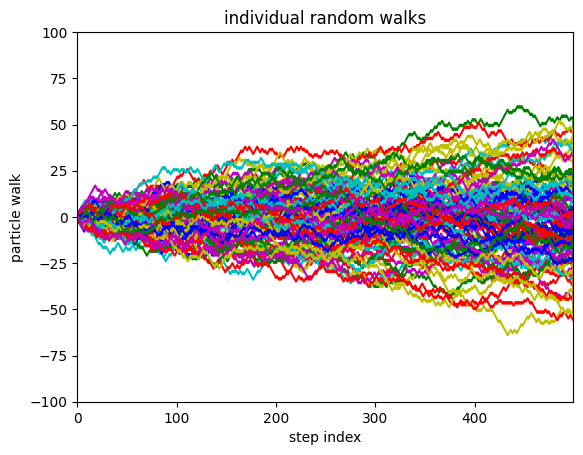

In [ ]:
# example of many random walks and statistical distributions

Nparticle = 100
Nstep = 500

for ip in range( 0, Nparticle): # loop over particles, index ip
    x = 0 # start at origin

    for ix in range( 0 , Nstep): # loop over steps, index ix
        x += np.random.choice(moves) # move by -1 or +1
        path[ix] = x

    plt.plot( step, path, colors[ ip%6 ]) # plot path of each particle

plt.title("individual random walks")
plt.xlabel("step index")
plt.ylabel("particle walk")
plt.xlim(0,499)
plt.ylim(-100,100)

(-5.0, 10.0)

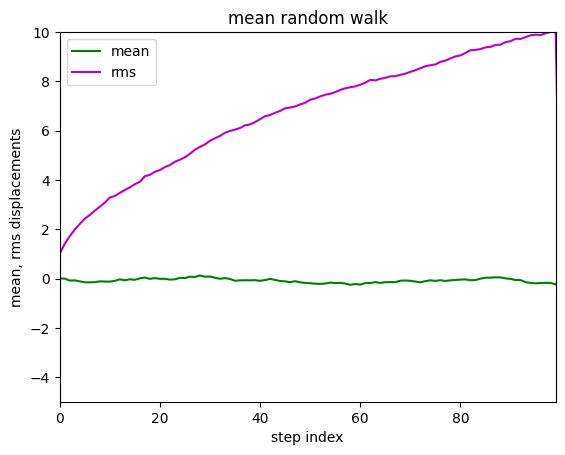

In [ ]:
# example of many random walks and statistical distributions

Nparticle = 1000
Nstep = 100

for ip in range( 0, Nparticle): # loop over particles, index ip
    x = 0 # start at origin

    for ix in range( 0 , Nstep): # loop over steps, index ix
        x += np.random.choice(moves) # move by -1 or +1
        path[ix] = x
        mean[ix] += x
        rmsq[ix] += x**2

    rnge[ip] = path[Nstep-1]              # calc range of each particle

mean /= Nparticle
rmsq /= Nparticle
rmsq = np.sqrt(rmsq)

plt.plot( step, mean, "g-",label="mean")
plt.plot( step, rmsq, "m-",label= "rms")
plt.title("mean random walk")
plt.xlabel("step index")
plt.ylabel("mean, rms displacements")
plt.legend()
plt.xlim(0,99)
plt.ylim(-5,10)

<BarContainer object of 201 artists>

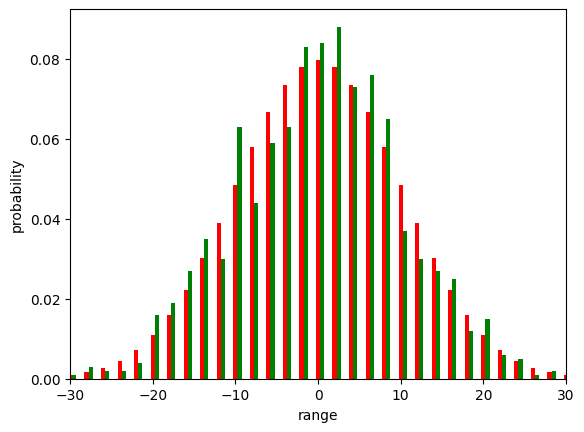

In [ ]:
# Comparision to probability distribution (N choose n)

move_n = np.arange( -Nstep, Nstep+1, 1) # array of possible moves
prob_n = np.zeros( 2*Nstep+1, dtype = float)  # array of move probabilities
for k in range(Nstep+1):
    prob_n[2*k] = np.math.comb(Nstep, k) / 2.**Nstep  # numpy (N choose n) divided by 2^N possibilities

barwidth = 0.5
plt.bar( move_n, prob_n, barwidth, color="r")
plt.xlabel('range')
plt.ylabel('probability')
plt.xlim(-30.,30)

vals, bins = np.histogram( rnge, bins=2*Nstep+1, range=(-Nstep,Nstep+1))
vals = vals / Nparticle
plt.bar(  move_n+barwidth, vals, barwidth, color="g")